Project 3 - Data Uber - by Emik

## Load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_uber2014 = pd.read_csv('uber2014.csv') #load hasil dataset dari project sebelumnya
data_uber2014.head()

Date/Time      Lat      Lon    Base weekday  day  minute  month  \
0  2014-09-01 00:01:00  40.2201 -74.0021  B02512  Monday    1       1      9   
1  2014-09-01 00:01:00  40.7500 -74.0027  B02512  Monday    1       1      9   
2  2014-09-01 00:03:00  40.7559 -73.9864  B02512  Monday    1       3      9   
3  2014-09-01 00:06:00  40.7450 -73.9889  B02512  Monday    1       6      9   
4  2014-09-01 00:11:00  40.8145 -73.9444  B02512  Monday    1      11      9   

   hour  year  
0     0  2014  
1     0  2014  
2     0  2014  
3     0  2014  
4     0  2014

In [3]:
data_uber2014['Date/Time'] = pd.to_datetime(data_uber2014['Date/Time'])
data_uber2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   weekday    object        
 5   day        int64         
 6   minute     int64         
 7   month      int64         
 8   hour       int64         
 9   year       int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 345.9+ MB


## Analisa 1: Tampilkan kepadatan traffic uber berdasarkan jam dan nama hari kerja

In [4]:
def count_rows(rows):
    return len(rows)

In [5]:
traffic_padat = data_uber2014.groupby(['weekday', 'hour']).apply(count_rows)
traffic_padat

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [6]:
pivot_weekdayhour = traffic_padat.unstack()
pivot_weekdayhour

hour          0      1      2      3     4      5      6      7      8   \
weekday                                                                   
Friday     13716   8163   5350   6930  8806  13450  23412  32061  31509   
Monday      6436   3737   2938   6232  9640  15032  23746  31159  29265   
Saturday   27633  19189  12710   9542  6846   7084   8579  11014  14411   
Sunday     32877  23015  15436  10597  6374   6169   6596   8728  12128   
Thursday    9293   5290   3719   5637  8505  14169  27065  37038  35431   
Tuesday     6237   3509   2571   4494  7548  14241  26872  36599  33934   
Wednesday   7644   4324   3141   4855  7511  13794  26943  36495  33826   

hour          9   ...     14     15     16     17     18     19     20     21  \
weekday           ...                                                           
Friday     25230  ...  36206  43673  48169  51961  54762  49595  43542  48323   
Monday     22197  ...  28157  32744  38770  42023  37000  34159  32849  28925   
Saturday   17669  ...  31418  38769  43512  42844  45883  41098  38714  43826   
Sunday     16401  ...  28151  31112  33038  31521  28291  25948  25076  23967   
Thursday   27812  ...  36699  44442  50560  56704  55825  51907  51990  51953   
Tuesday    25023  ...  34846  41338  48667  55500  50186  44789  44661  39913   
Wednesday  25635  ...  35148  43388  50684  55637  52732  47017  47772  44553   

hour          22     23  
weekday                  
Friday     49409  41260  
Monday     20158  11811  
Saturday   47951  43174  
Sunday     19566  12166  
Thursday   44194  27764  
Tuesday    27712  14869  
Wednesday  32868  18146  

[7 rows x 24 columns]

kalau mau buat heatmap, datanya harus berupa pivot table, makanya data yang hasil groupby tadi perlu di-unstack.

- unstack -> mengubah hasil groupby jadi pivot table
- stack -> mengubah pivot table menjadi groupby


<Axes: xlabel='hour', ylabel='weekday'>

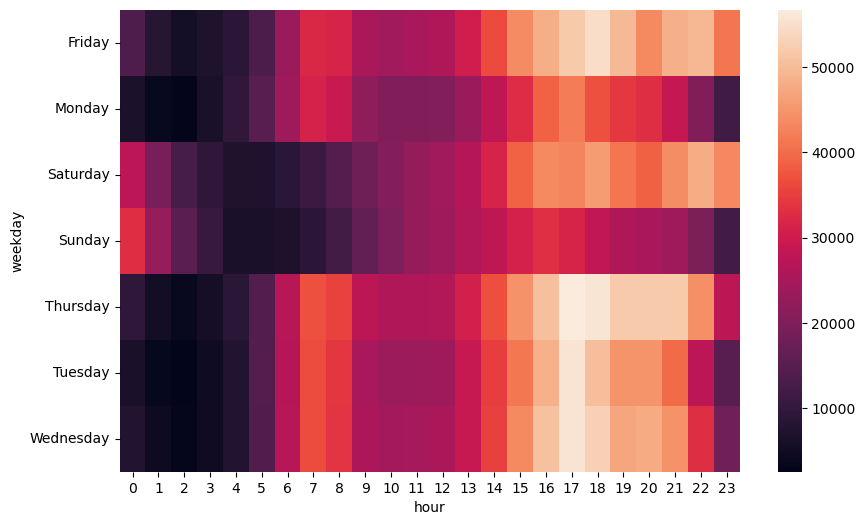

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_weekdayhour, annot=False)

#annot itu kalau True maka angkanya tampil di tiap kotak heatmap

Makin cerah warnanya maka traffic makin padat. Contohnya pada hari kamis traffic terpadat terjadi pada jam 5 sore.

In [8]:
#function untuk memudahkan membuat heatmap

def make_heatmap(col1,col2):
    traffic_padat = data_uber2014.groupby([col1,col2]).apply(lambda x : len(x))
    pivot = traffic_padat.unstack()
    plt.figure(figsize=(10,6))
    return sns.heatmap(pivot, annot=False)

<Axes: xlabel='month', ylabel='day'>

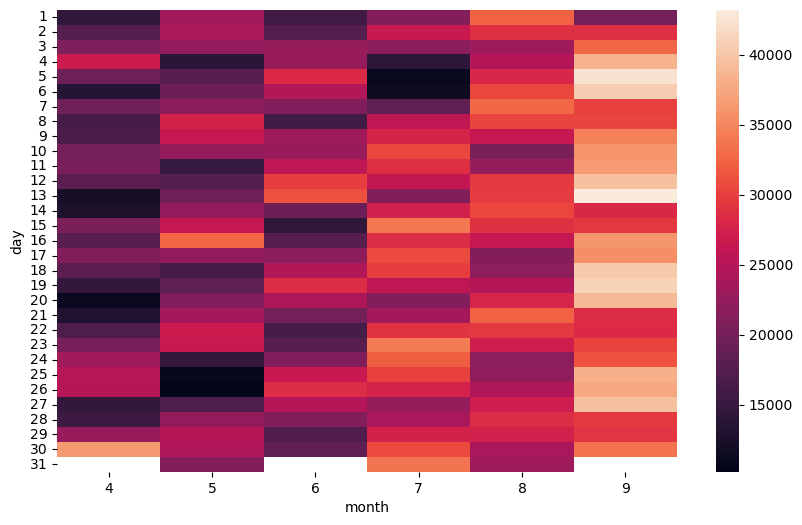

In [9]:
make_heatmap('day','month')

Secara garis besar, perjalanan uber meningkat setiap bulannya (ditunjukkan grafik yang makin cerah)

In [10]:
#contoh filter per bulan

filter_bulan4 = data_uber2014[data_uber2014['month']==4]

traffic_bulan4 = filter_bulan4.groupby(['weekday', 'month']).apply(count_rows)

pivot_bulan4 = traffic_bulan4.unstack()

plt.figure(figsize=(10,6))
sns.heatmap(pivot_bulan4, annot=False)

<Axes: xlabel='month', ylabel='weekday'>

## Analisa 2: Mapping kepadatan traffic uber berdasarkan lokasi (Lat, Lon)

(40.6, 41.0)

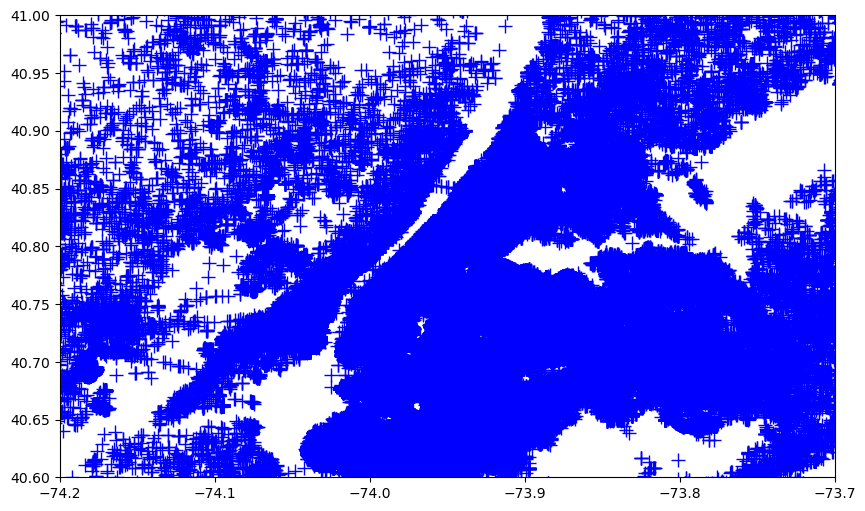

In [11]:
plt.figure(figsize=(10,6))

plt.plot(data_uber2014['Lon'], data_uber2014['Lat'], 'b+', ms=10)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6, 41)

In [12]:
# buat filter hanya untuk hari minggu saja

filter_sunday = data_uber2014[data_uber2014['weekday']=='Sunday']
filter_sunday.head()

Date/Time      Lat      Lon    Base weekday  day  minute  \
8011 2014-09-07 00:00:00  40.7341 -74.0005  B02512  Sunday    7       0   
8012 2014-09-07 00:00:00  40.7344 -73.9900  B02512  Sunday    7       0   
8013 2014-09-07 00:00:00  40.7806 -73.9582  B02512  Sunday    7       0   
8014 2014-09-07 00:01:00  40.7293 -73.9859  B02512  Sunday    7       1   
8015 2014-09-07 00:01:00  40.7713 -74.0133  B02512  Sunday    7       1   

      month  hour  year  
8011      9     0  2014  
8012      9     0  2014  
8013      9     0  2014  
8014      9     0  2014  
8015      9     0  2014

In [13]:
!pip install folium

In [14]:
import folium
from folium.plugins import HeatMap

In [33]:
filter_sunday.groupby(['Lat', 'Lon'])['weekday'].count()

Lat      Lon     
39.9374  -74.0722    1
39.9378  -74.0721    1
39.9384  -74.0742    1
39.9385  -74.0734    1
39.9415  -74.0736    1
                    ..
41.3141  -74.1249    1
41.3180  -74.1298    1
41.3195  -73.6905    1
41.3197  -73.6903    1
42.1166  -72.0666    1
Name: weekday, Length: 209230, dtype: int64

In [ ]:
filter_sunday.groupby(['Lat', 'Lon'])['weekday'].count().reset_index()
#reset index buat ngubah hasil groupby jadi df
#biasa dipakai sebelum save hasil groupby jadi csv

Lat      Lon  weekday
0       39.9374 -74.0722        1
1       39.9378 -74.0721        1
2       39.9384 -74.0742        1
3       39.9385 -74.0734        1
4       39.9415 -74.0736        1
...         ...      ...      ...
209225  41.3141 -74.1249        1
209226  41.3180 -74.1298        1
209227  41.3195 -73.6905        1
209228  41.3197 -73.6903        1
209229  42.1166 -72.0666        1

[209230 rows x 3 columns]

In [ ]:
basemap = folium.Map()

HeatMap(filter_sunday.groupby(['Lat', 'Lon'])['weekday'].count().reset_index(),
        zoom=20, radius=15).add_to(basemap)

#konsepnya HeatMap(data)add_to(basemap), zoom sama radius tidak wajib

basemap

In [16]:
#buat fungsi

def plot_HeatMap(df, day):
    filter_hari = df[df['weekday']==day]
    HeatMap(filter_hari.groupby(['Lat', 'Lon'])['weekday'].count().reset_index(),
            zoom=20, radius=15).add_to(basemap)
    return basemap

## assignment

Analisa 1: pakai data uber-raw-data-janjune-15.csv

In [17]:
data_uber2015 = pd.read_csv('uber-raw-data-janjune-15.csv')
data_uber2015.head()

Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90

In [18]:
data_uber2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [19]:
#cek null

data_uber2015.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
dtype: int64

In [64]:
data_uber2015.fillna('No Affiliate', inplace = True)

In [65]:
data_uber2015.isnull().sum()

Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
nama_hari               0
bulan                   0
tanggal                 0
jam                     0
menit                   0
detik                   0
dtype: int64

In [ ]:
# nomor 1 dan 2: tanggal pickup terkecil dan terbesar
print('Tanggal pickup date terkecil: ', data_uber2015['Pickup_date'].min())
print('Tanggal pickup date terbesar: ', data_uber2015['Pickup_date'].max())

Tanggal pickup date terkecil:  2015-01-01 00:00:05
Tanggal pickup date terbesar:  2015-06-30 23:59:00


In [21]:
# nomor 3: sesuaikan tipe data pada Pickup_date dan pecah jadi beberapa kolom spesifik

data_uber2015['Pickup_date'] = pd.to_datetime(data_uber2015['Pickup_date'])

data_uber2015['nama_hari'] = data_uber2015['Pickup_date'].dt.day_name()
data_uber2015['bulan'] = data_uber2015['Pickup_date'].dt.month
data_uber2015['tanggal'] = data_uber2015['Pickup_date'].dt.day
data_uber2015['jam'] = data_uber2015['Pickup_date'].dt.hour
data_uber2015['menit'] = data_uber2015['Pickup_date'].dt.minute
data_uber2015['detik'] = data_uber2015['Pickup_date'].dt.second

data_uber2015.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
nama_hari                       object
bulan                            int32
tanggal                          int32
jam                              int32
menit                            int32
detik                            int32
dtype: object

In [22]:
data_uber2015.head()

Dispatching_base_num         Pickup_date Affiliated_base_num  locationID  \
0               B02617 2015-05-17 09:47:00              B02617         141   
1               B02617 2015-05-17 09:47:00              B02617          65   
2               B02617 2015-05-17 09:47:00              B02617         100   
3               B02617 2015-05-17 09:47:00              B02774          80   
4               B02617 2015-05-17 09:47:00              B02617          90   

  nama_hari  bulan  tanggal  jam  menit  detik  
0    Sunday      5       17    9     47      0  
1    Sunday      5       17    9     47      0  
2    Sunday      5       17    9     47      0  
3    Sunday      5       17    9     47      0  
4    Sunday      5       17    9     47      0

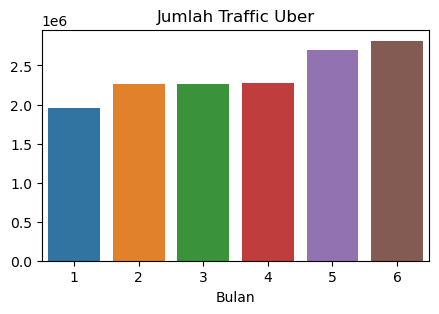

In [23]:
# nomor 4: barplot jumlah traffic uber per bulannya

uber_perbulan = data_uber2015.groupby('bulan')['bulan'].count() 

plt.figure(figsize=[5,3])
sns.barplot(x = uber_perbulan.index, y = uber_perbulan.values, data = data_uber2015)
plt.xlabel('Bulan')
plt.title('Jumlah Traffic Uber')
plt.show()

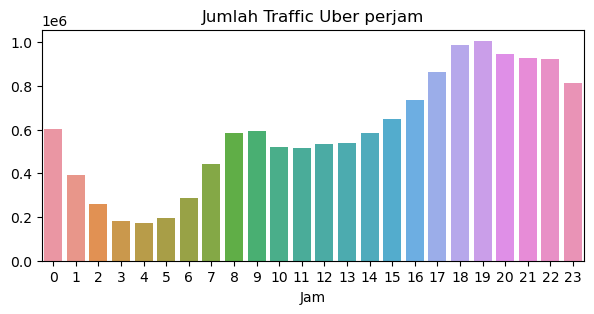

In [24]:
# nomor 5: jumlah traffic uber tiap jamnya

uber_perjam = data_uber2015.groupby('jam')['jam'].count() 

plt.figure(figsize=[7,3])
sns.barplot(x = uber_perjam.index, y = uber_perjam.values, data = data_uber2015)
plt.xlabel('Jam')
plt.title('Jumlah Traffic Uber perjam')
plt.show()

Text(0.5, 1.0, 'perbedaan pola traffic uber per jam tiap harinya')

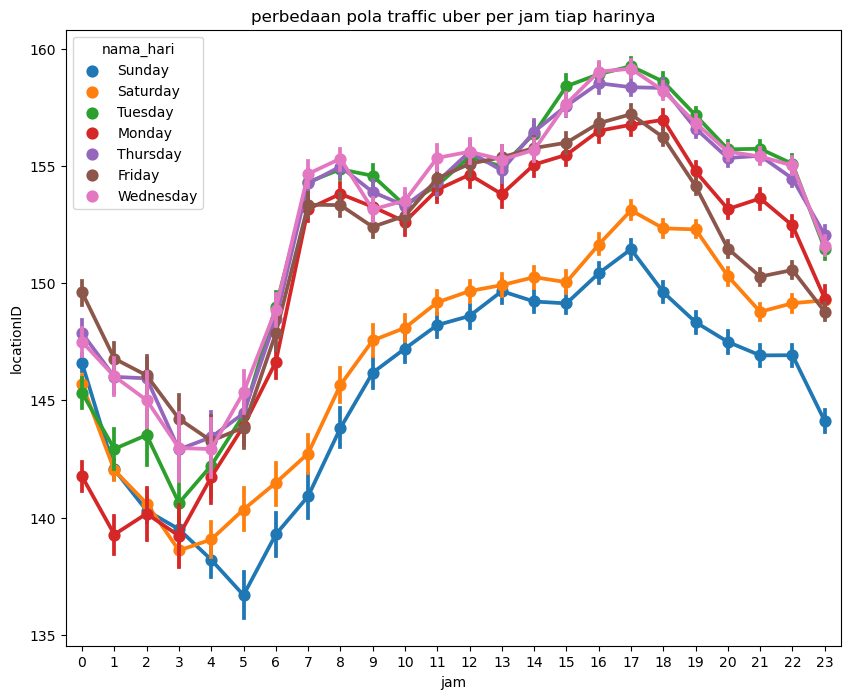

In [25]:
#  nomor 6: perbedaan pola traffic uber per jam tiap harinya

plt.figure(figsize=(10,8))
ax = sns.pointplot(x='jam', y='locationID', hue='nama_hari', data=data_uber2015)
ax.set_title('perbedaan pola traffic uber per jam tiap harinya')


Analisa 2: pakai data uber-jan-feb-FOIL.csv

In [51]:
data_uberFOIL = pd.read_csv('Uber-Jan-Feb-FOIL.csv')
data_uberFOIL.head()

dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537

In [52]:
data_uberFOIL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [53]:
# nomor 1: list basenumber

data_uberFOIL['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

Text(0, 0.5, 'Number of Active Vehicles')

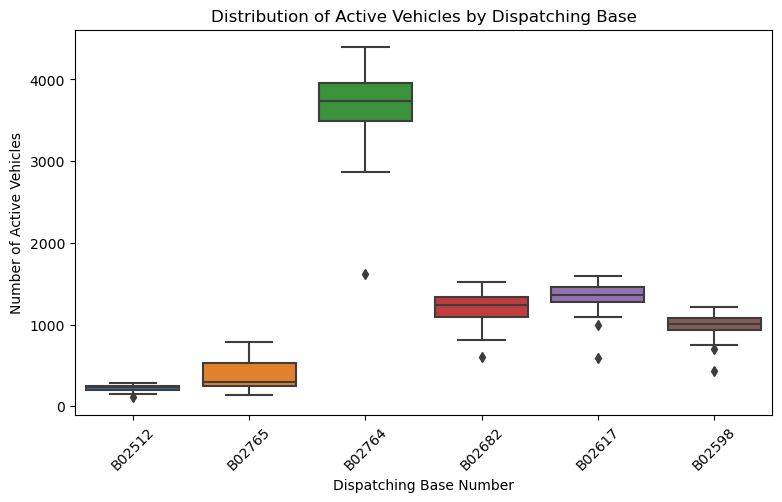

In [69]:
# nomor 2: sebaran basenumber dengan kendaraan aktif

plt.figure(figsize=(9,5))

sns.boxplot(x="dispatching_base_number", y="active_vehicles", data= data_uberFOIL)
plt.xticks(rotation=45)
plt.title("Distribution of Active Vehicles by Dispatching Base")
plt.xlabel("Dispatching Base Number")
plt.ylabel("Number of Active Vehicles")


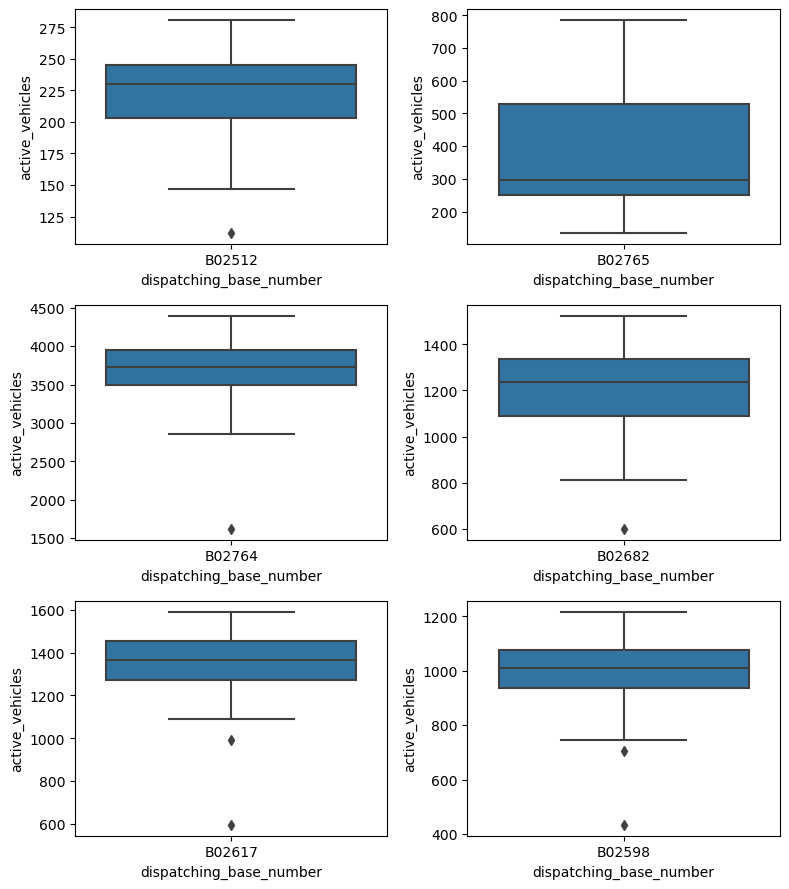

In [ ]:
# nomor 2: sebaran basenumber dengan kendaraan aktif

data_B02512 = data_uberFOIL[data_uberFOIL["dispatching_base_number"] == 'B02512']
data_B02765 = data_uberFOIL[data_uberFOIL["dispatching_base_number"] == 'B02765']
data_B02764 = data_uberFOIL[data_uberFOIL["dispatching_base_number"] == 'B02764']
data_B02682 = data_uberFOIL[data_uberFOIL["dispatching_base_number"] == 'B02682']
data_B02617 = data_uberFOIL[data_uberFOIL["dispatching_base_number"] == 'B02617']
data_B02598 = data_uberFOIL[data_uberFOIL["dispatching_base_number"] == 'B02598']

plt.figure(figsize=[8,9])

plt.subplot(321)
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=data_B02512)

plt.subplot(322)
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=data_B02765)

plt.subplot(323)
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=data_B02764)

plt.subplot(324)
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=data_B02682)

plt.subplot(325)
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=data_B02617)

plt.subplot(326)
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=data_B02598)

plt.tight_layout()
plt.show()

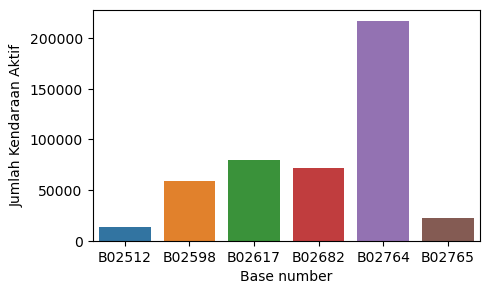

In [ ]:
#coba tampilkan jumlahnya dengan barplot

FOIL_basenumber = data_uberFOIL.groupby('dispatching_base_number')['active_vehicles'].sum() 

plt.figure(figsize=[5,3])
sns.barplot(x = FOIL_basenumber.index, y = FOIL_basenumber.values, data = data_uber2015)
plt.xlabel('Base number')
plt.ylabel('Jumlah Kendaraan Aktif')
plt.show()

In [31]:
# nomor 3: jumlah perjalanan masing-masing basenumber

FOIL_basetrips = data_uberFOIL.groupby('dispatching_base_number')[['trips']].sum() 
FOIL_basetrips

trips
dispatching_base_number         
B02512                     93786
B02598                    540791
B02617                    725025
B02682                    662509
B02764                   1914449
B02765                    193670

In [32]:
# nomor 4: rata-rata jumlah perjalanan masing-masing basenumber berdasarkan tanggal

FOIL_meantrips = data_uberFOIL.groupby(['date','dispatching_base_number'])[['trips']].mean() 
FOIL_meantrips

trips
date     dispatching_base_number         
1/1/2015 B02512                    1132.0
         B02598                    6903.0
         B02617                    9537.0
         B02682                    7679.0
         B02764                   29421.0
...                                   ...
2/9/2015 B02598                    8135.0
         B02617                   10887.0
         B02682                   10209.0
         B02764                   28266.0
         B02765                    2894.0

[354 rows x 1 columns]

<Axes: xlabel='dispatching_base_number', ylabel='date'>

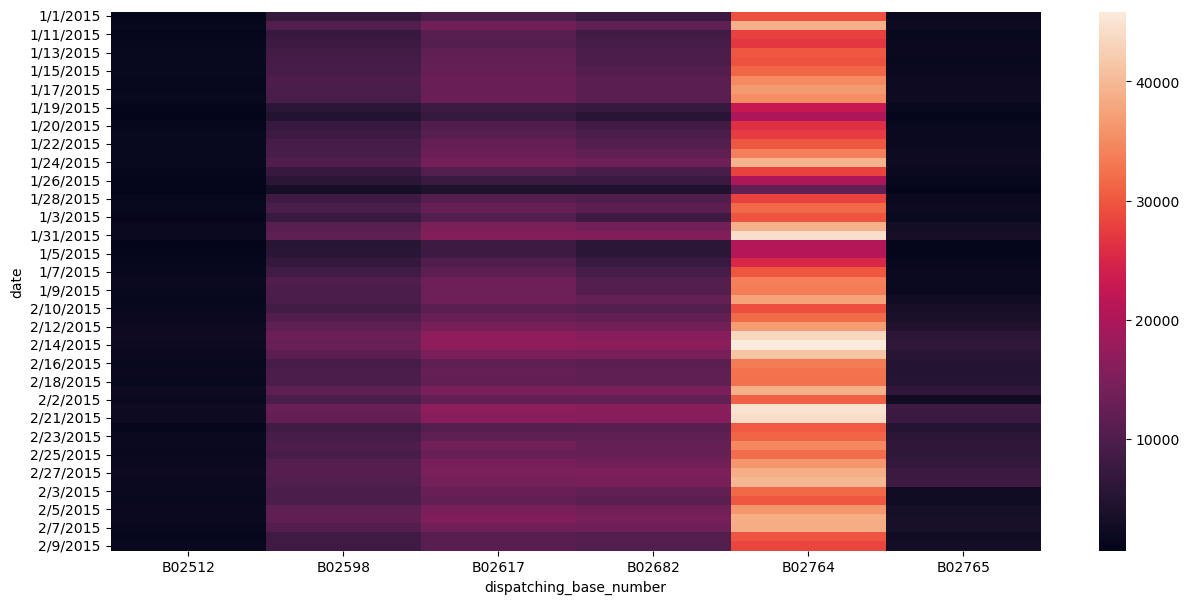

In [70]:
rata = data_uberFOIL.groupby(["date", "dispatching_base_number"])["trips"].mean()
pivot = rata.unstack()

plt.figure(figsize=(15,7))
sns.heatmap(pivot)